In [1]:
#! pip install COVID19Py 
import COVID19Py
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
covid19 = COVID19Py.COVID19(data_source='jhu')

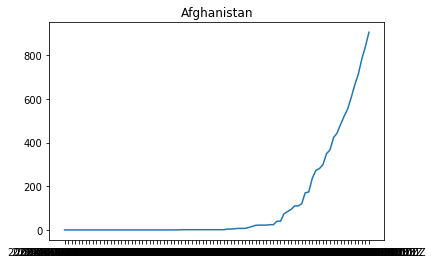

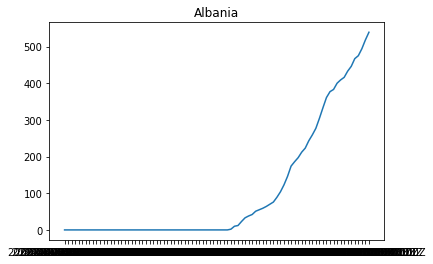

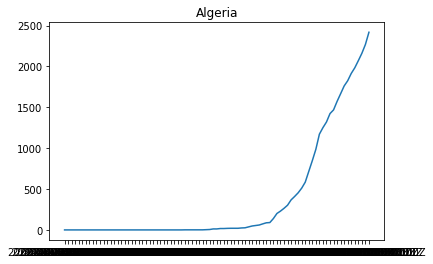

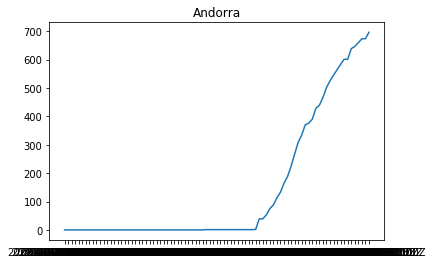

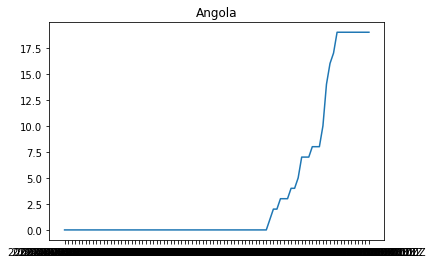

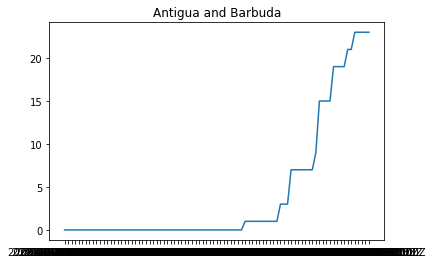

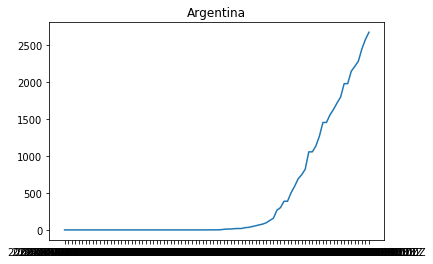

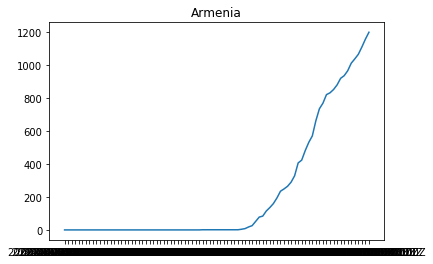

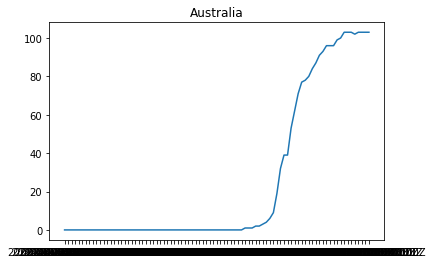

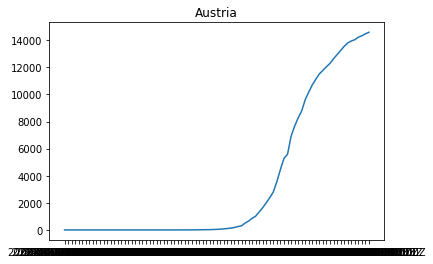

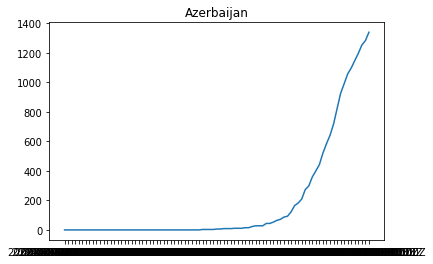

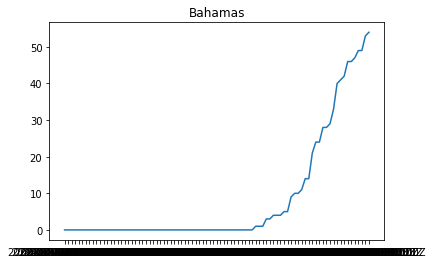

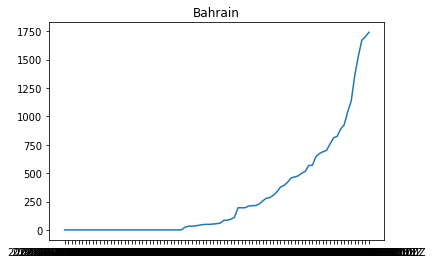

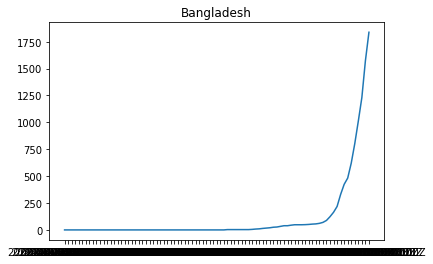

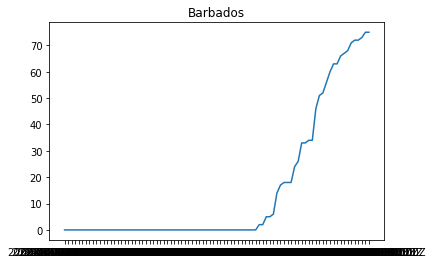

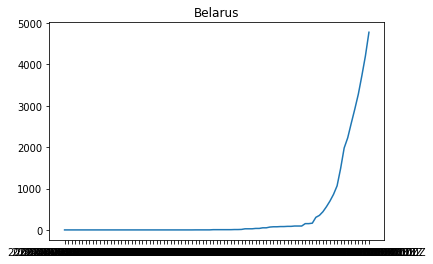

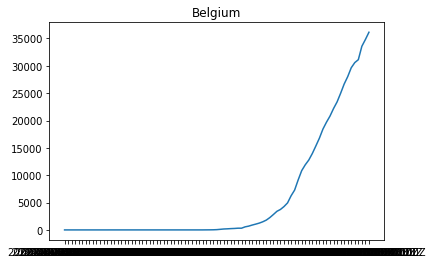

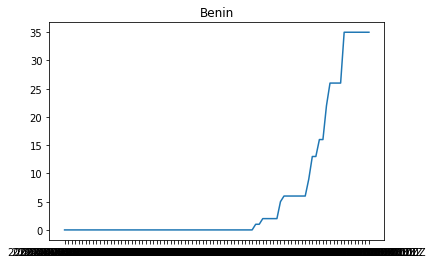

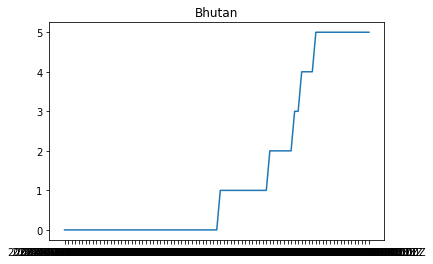

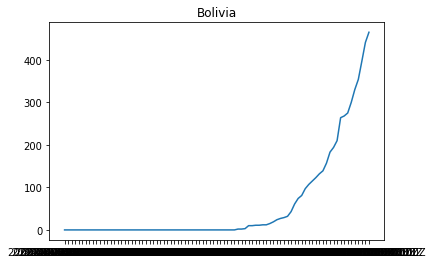

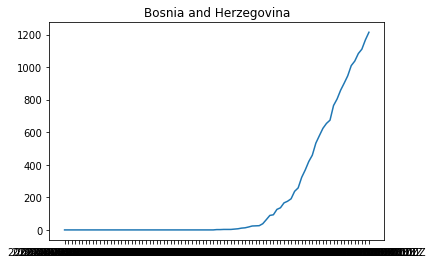

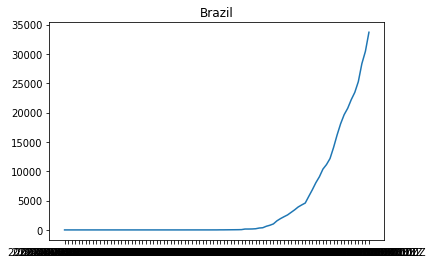

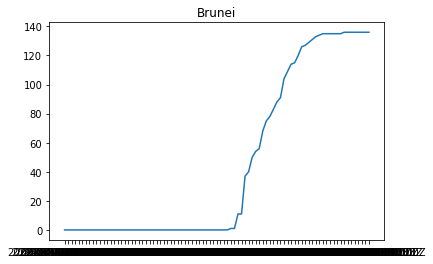

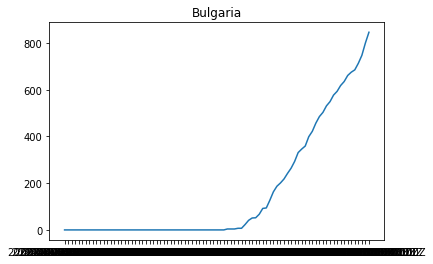

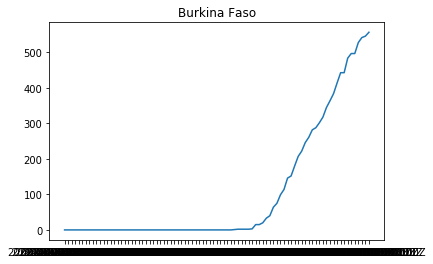

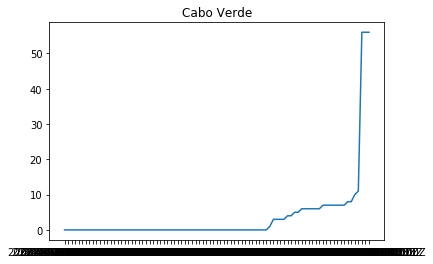

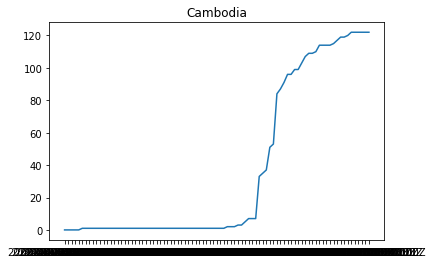

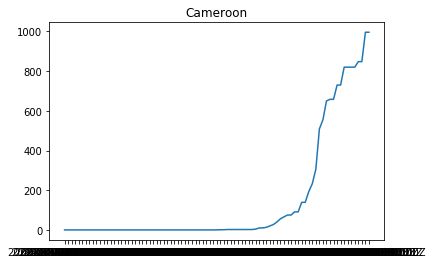

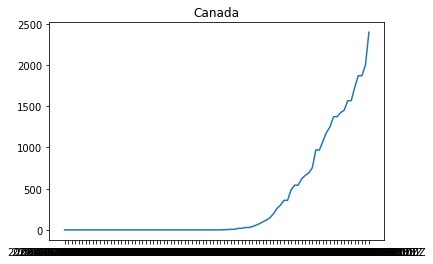

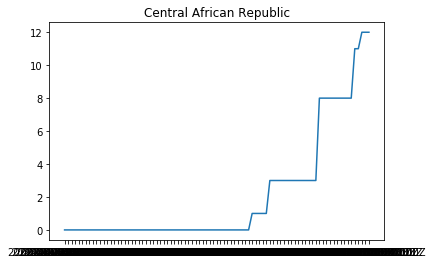

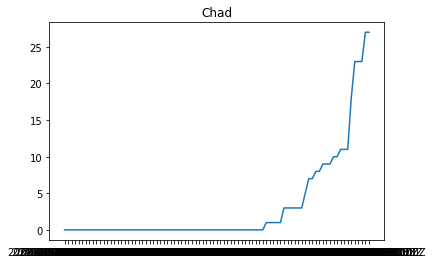

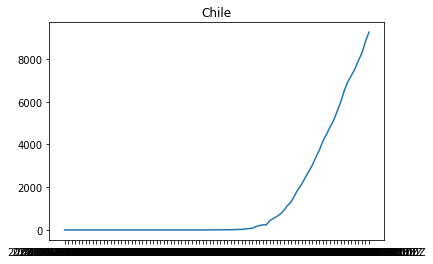

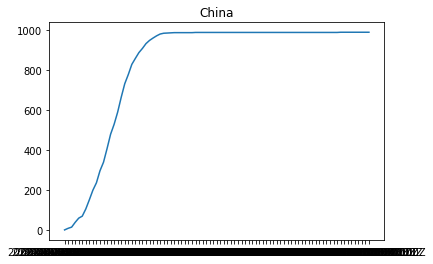

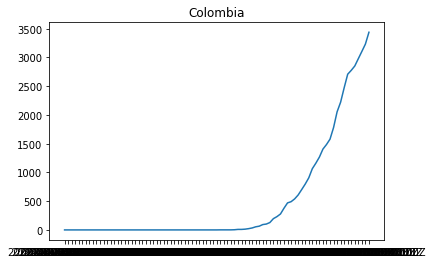

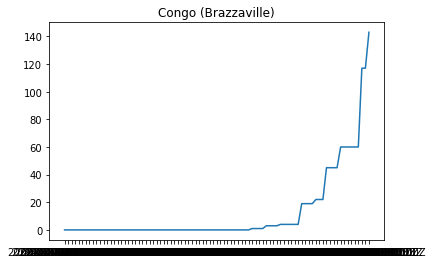

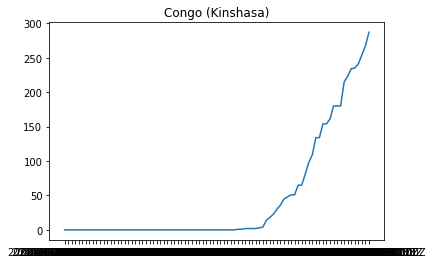

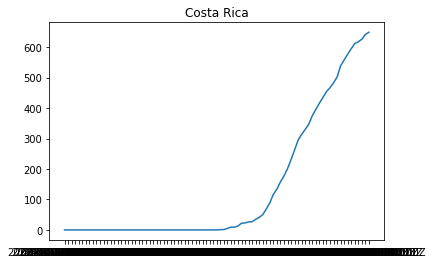

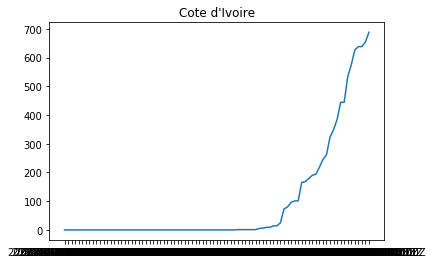

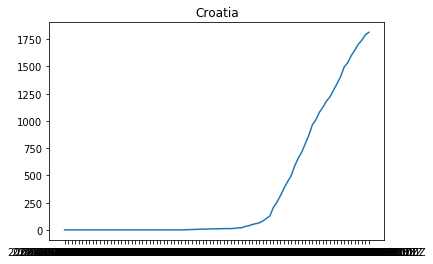

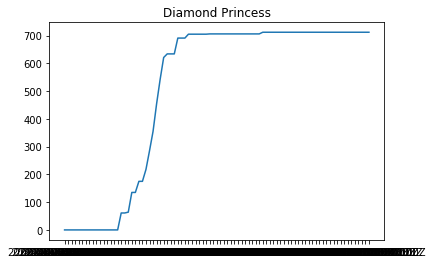

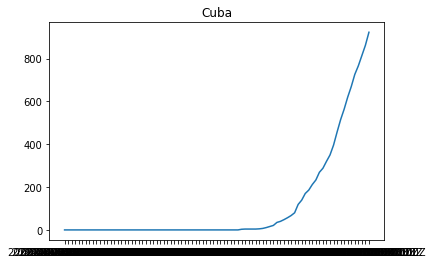

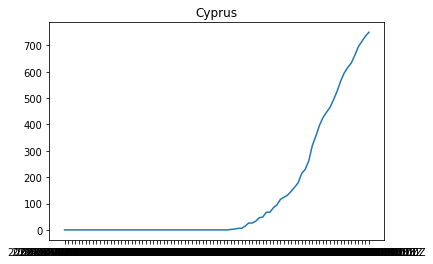

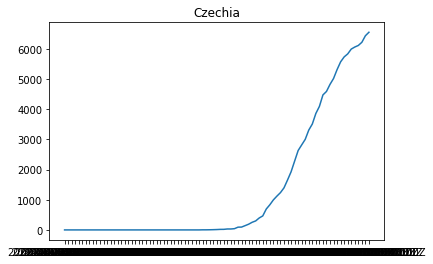

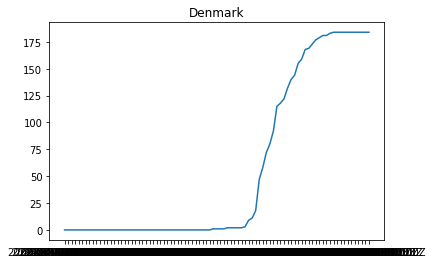

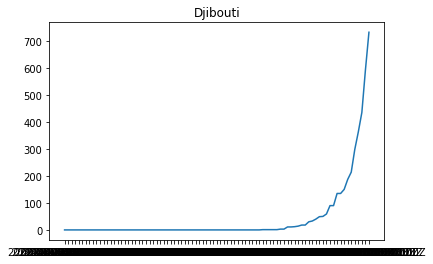

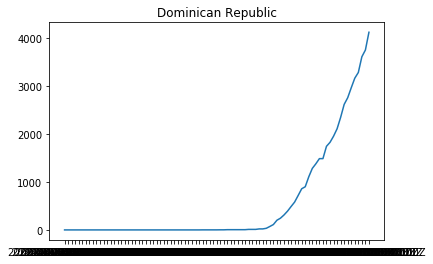

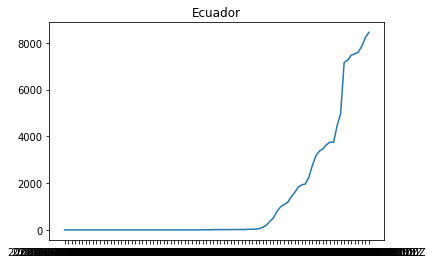

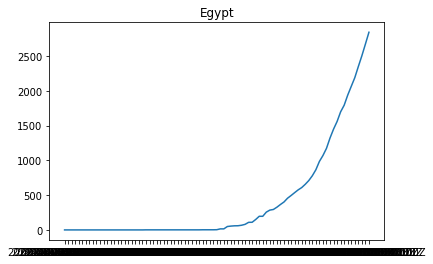

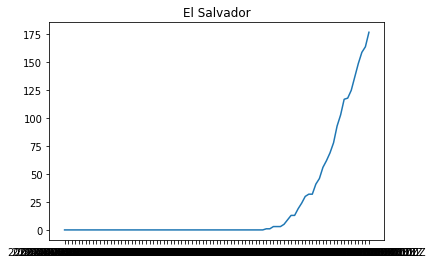

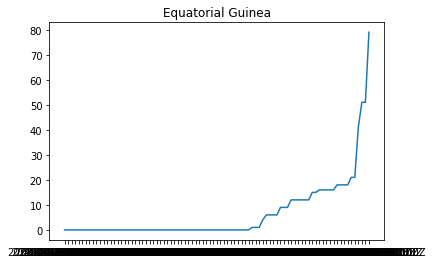

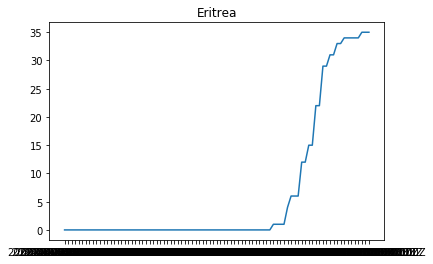

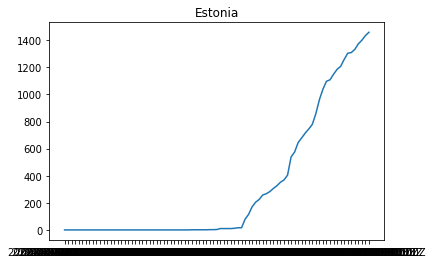

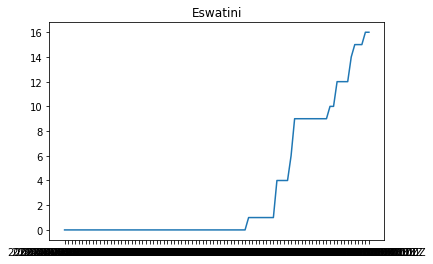

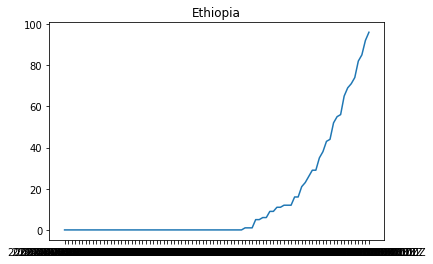

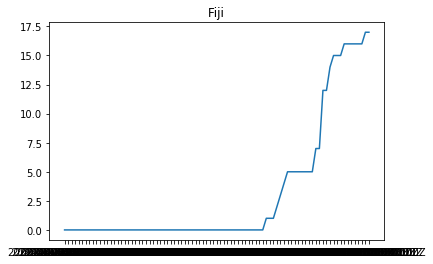

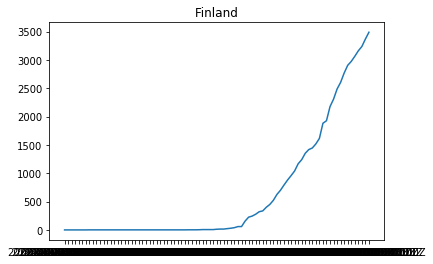

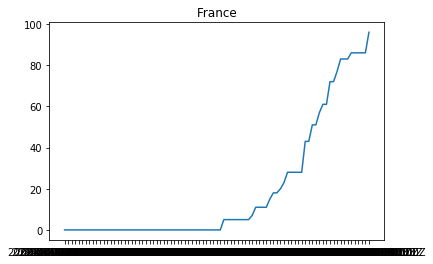

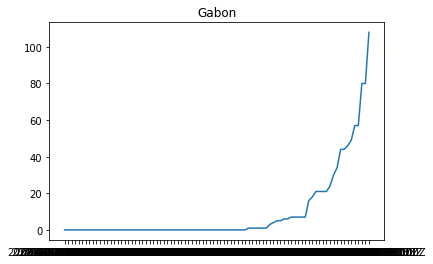

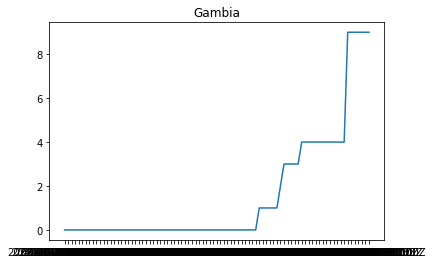

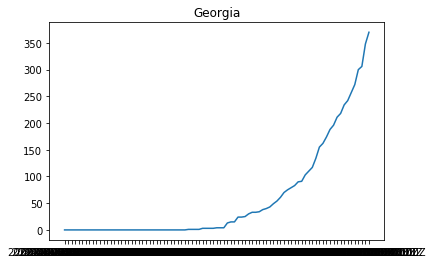

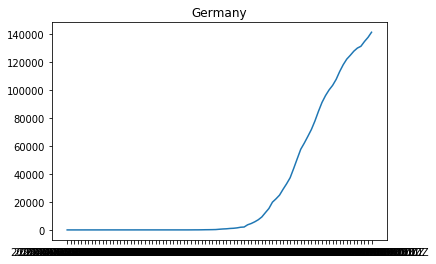

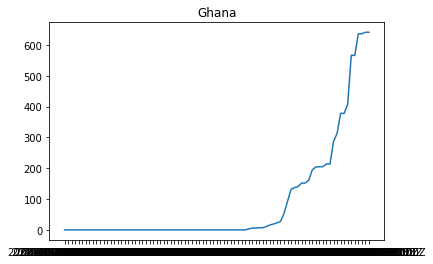

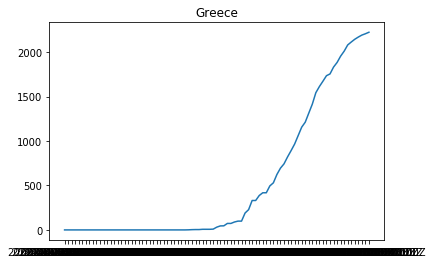

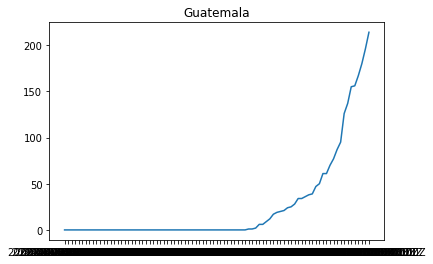

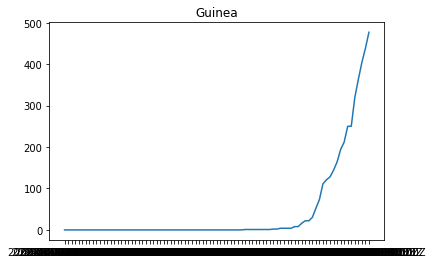

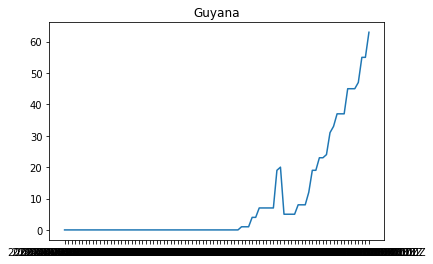

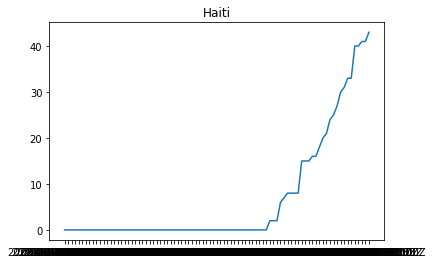

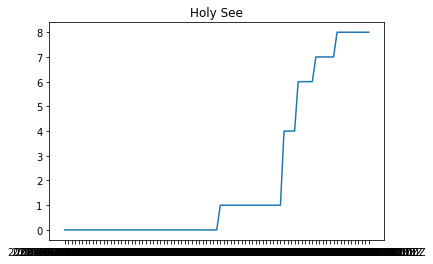

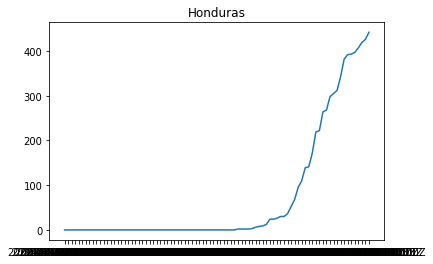

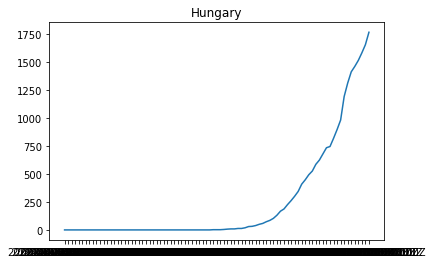

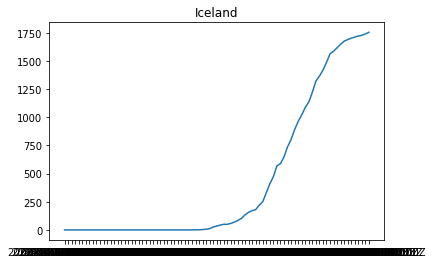

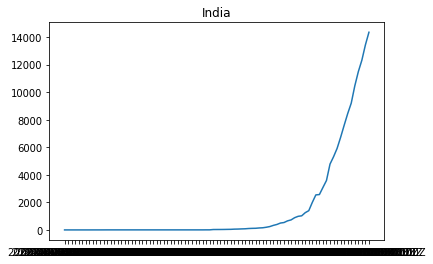

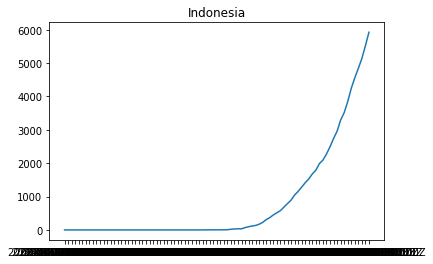

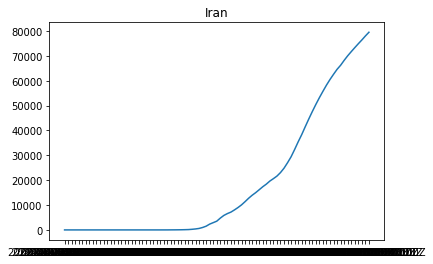

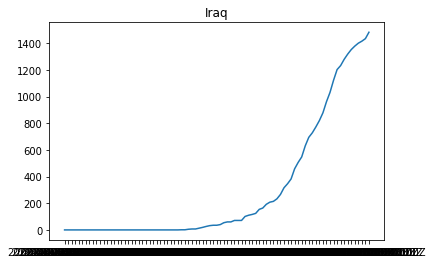

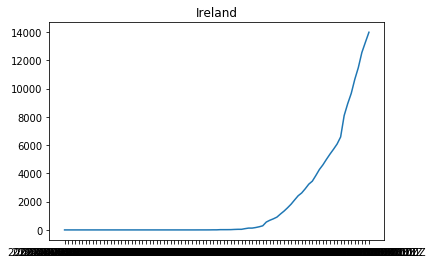

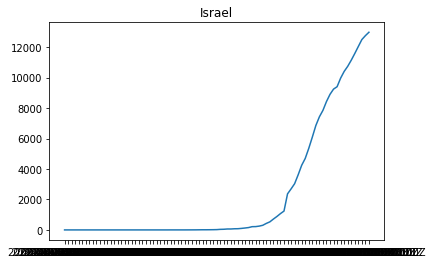

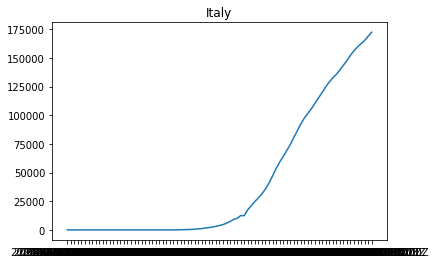

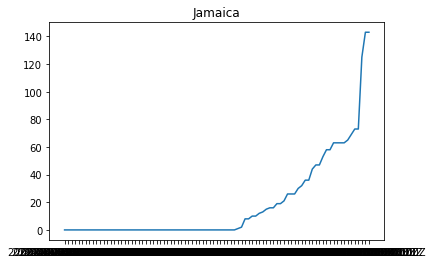

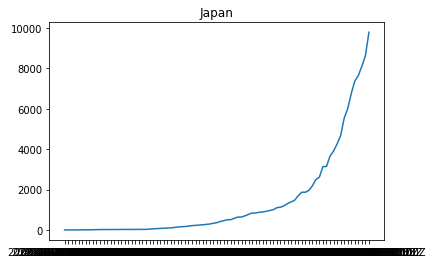

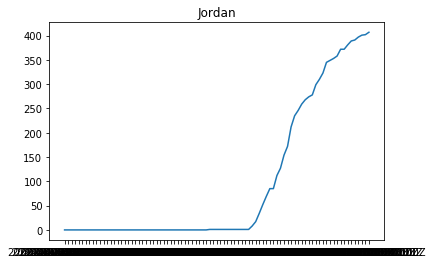

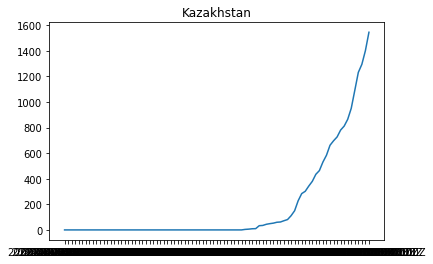

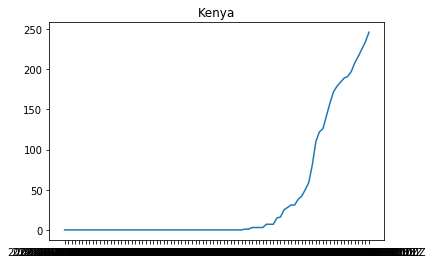

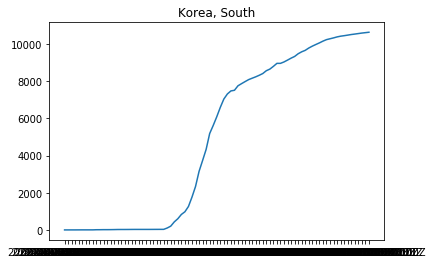

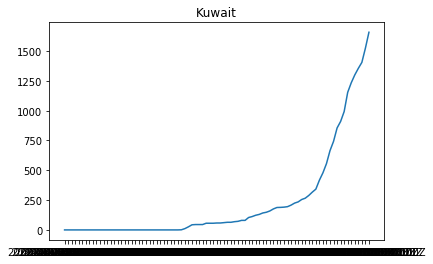

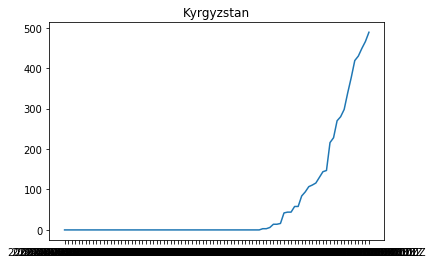

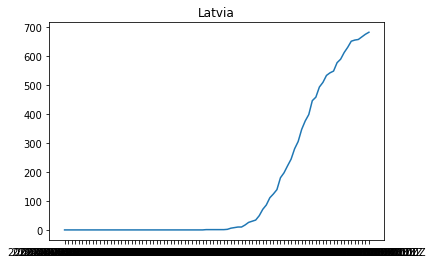

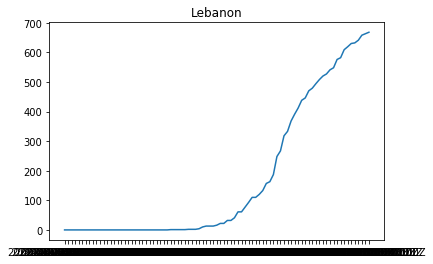

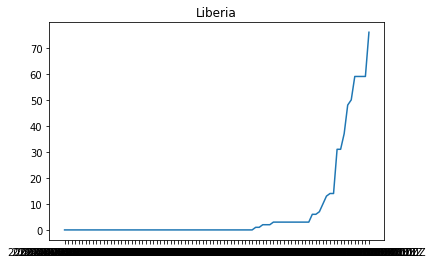

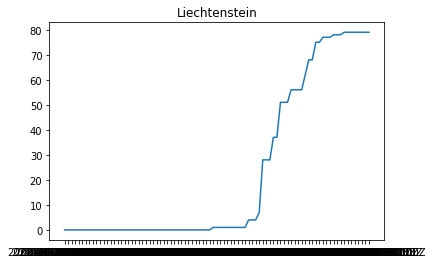

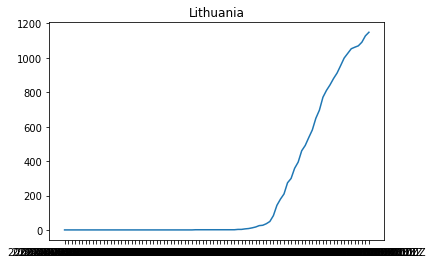

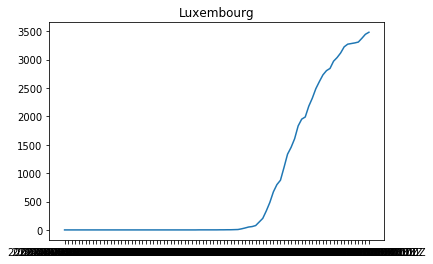

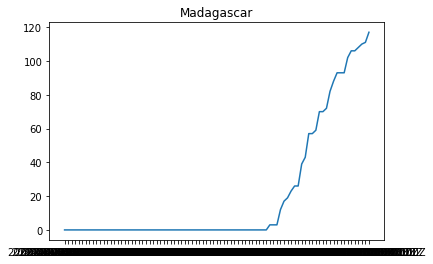

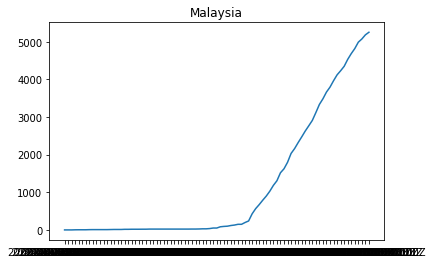

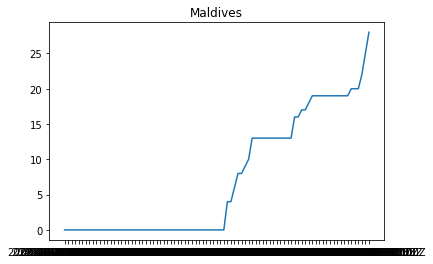

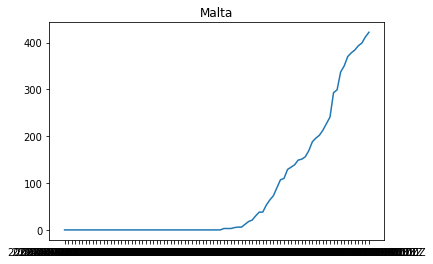

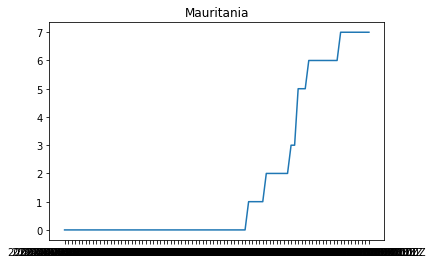

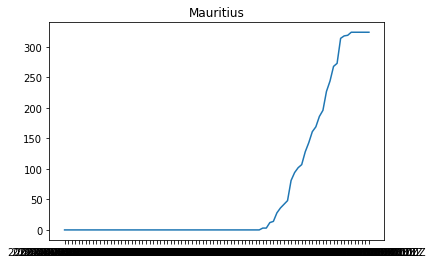

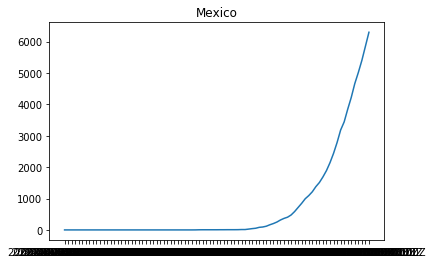

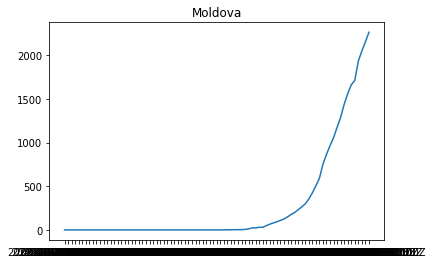

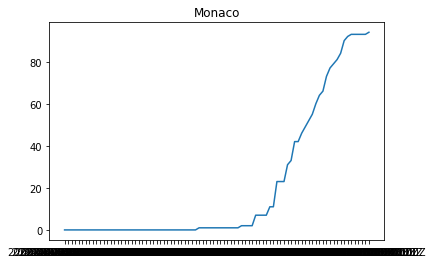

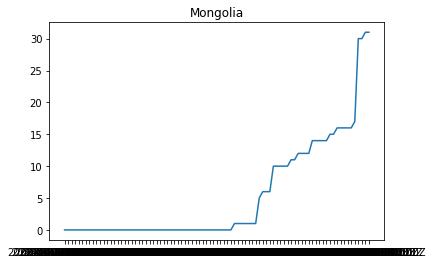

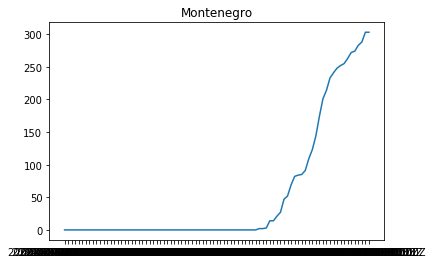

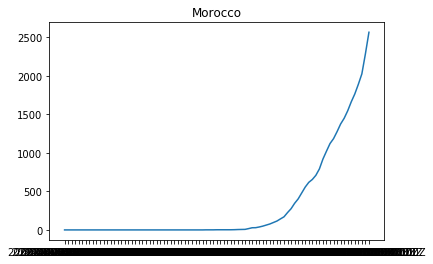

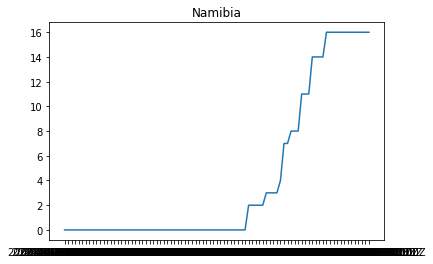

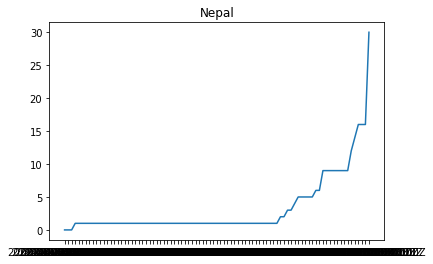

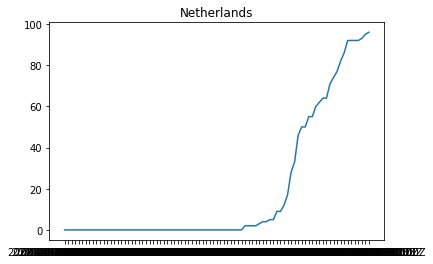

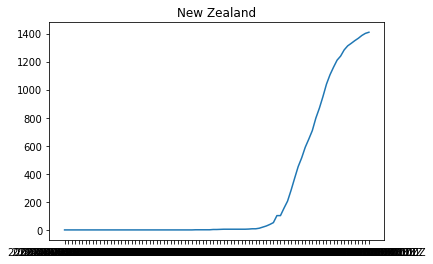

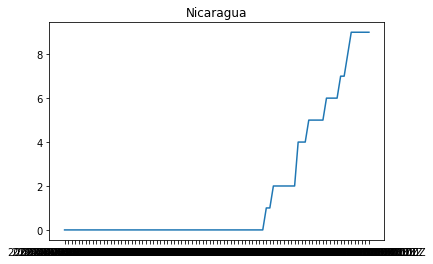

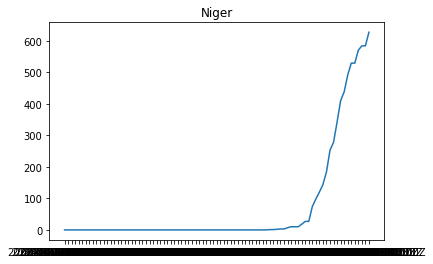

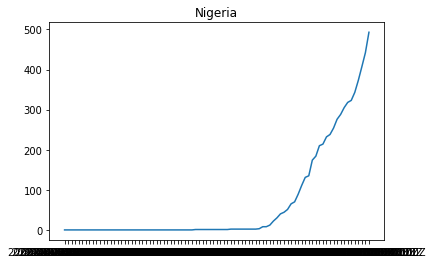

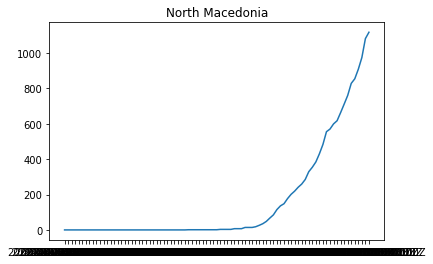

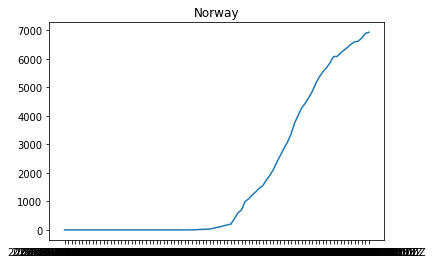

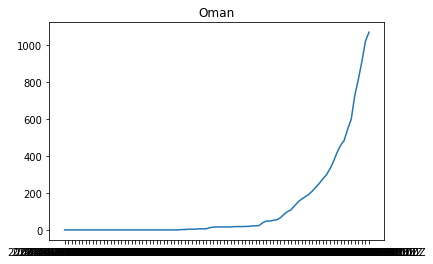

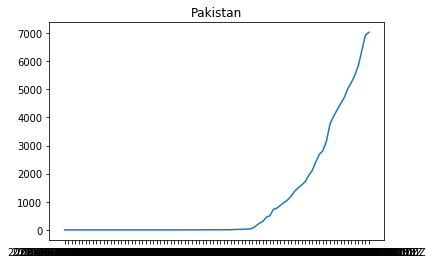

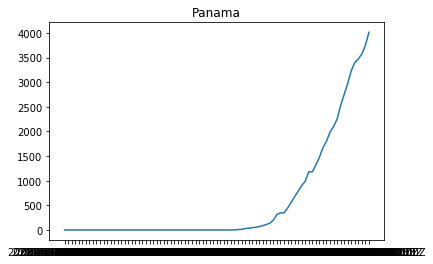

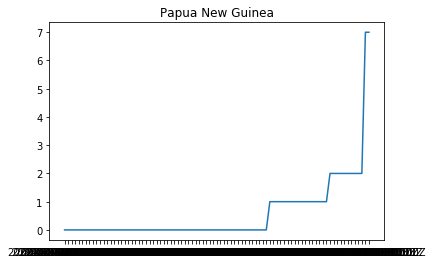

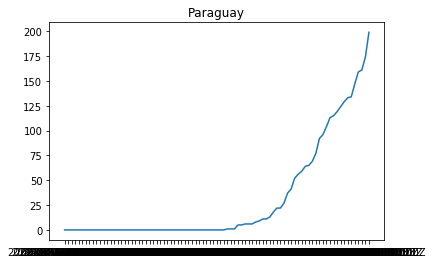

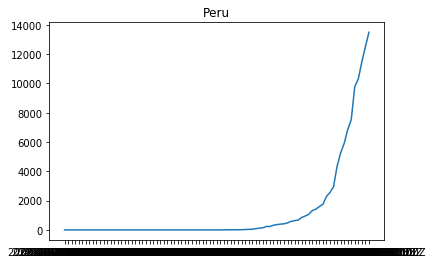

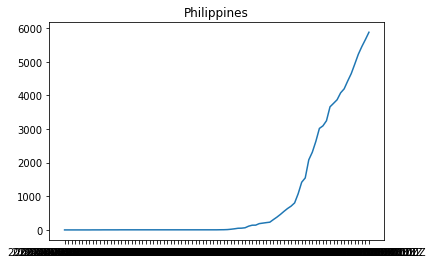

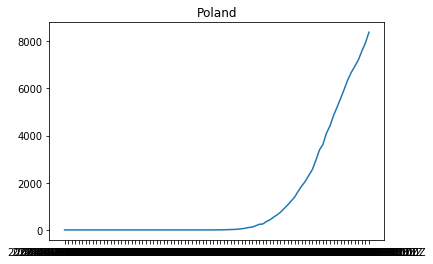

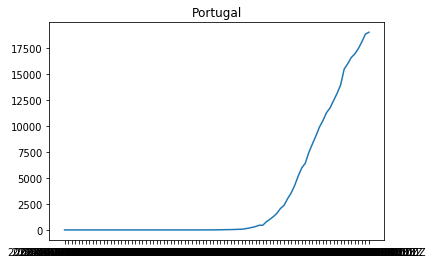

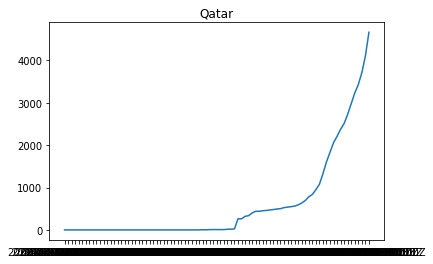

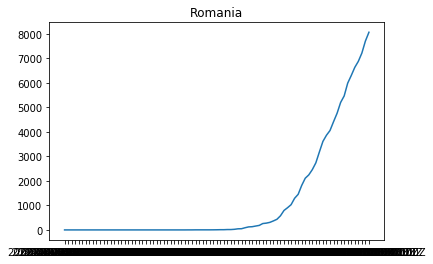

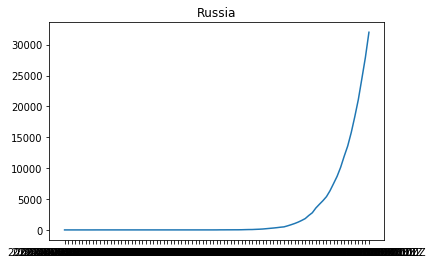

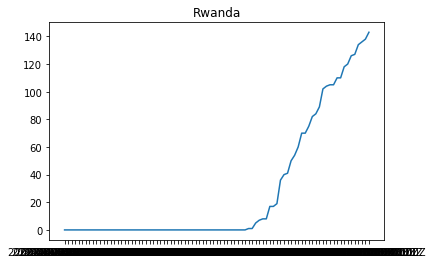

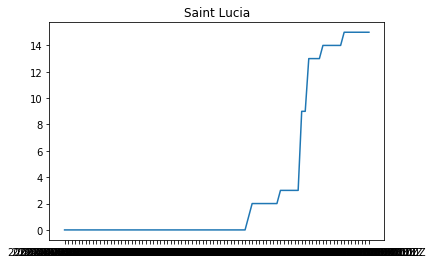

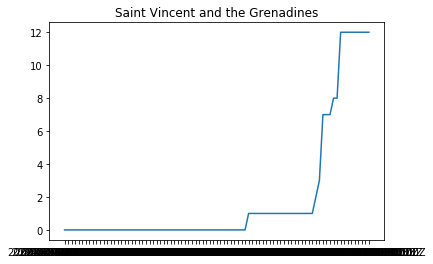

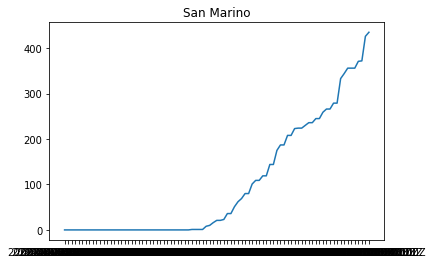

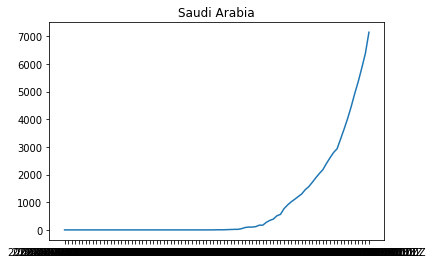

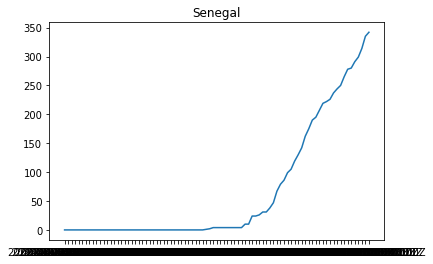

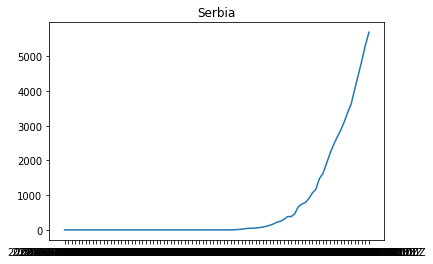

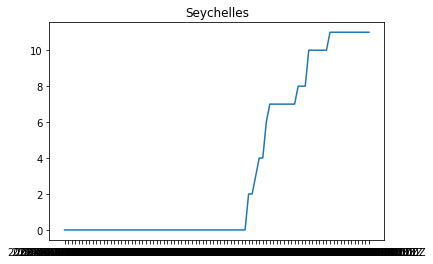

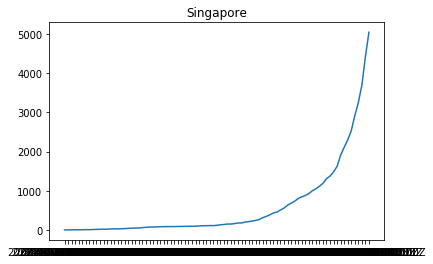

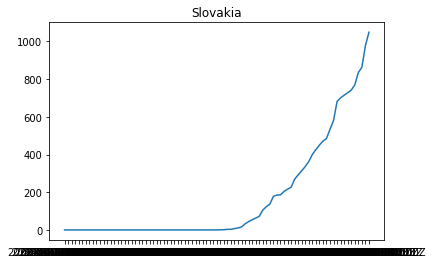

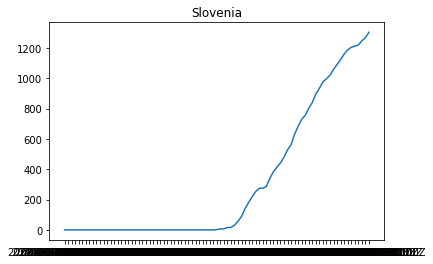

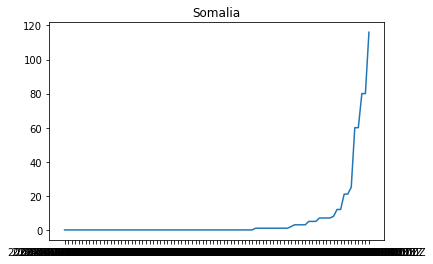

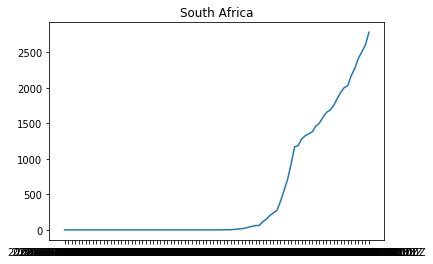

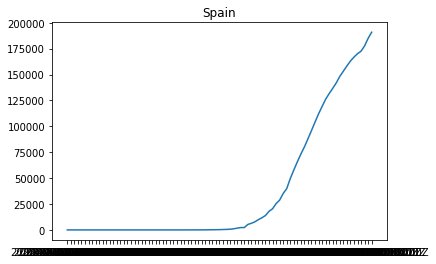

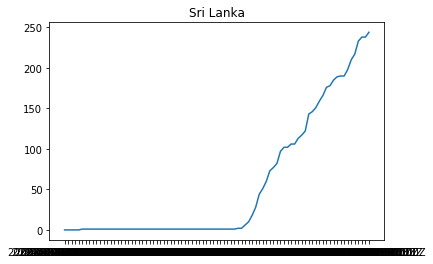

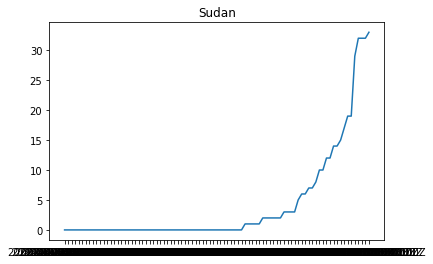

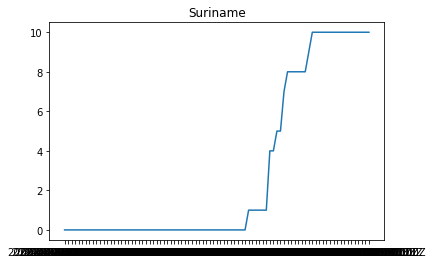

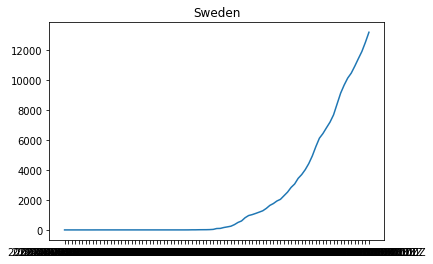

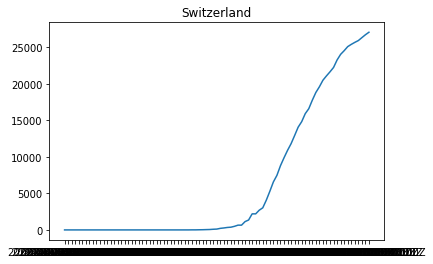

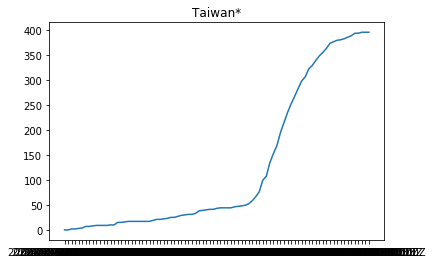

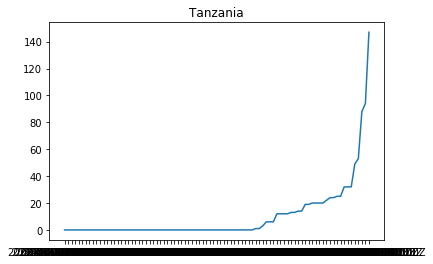

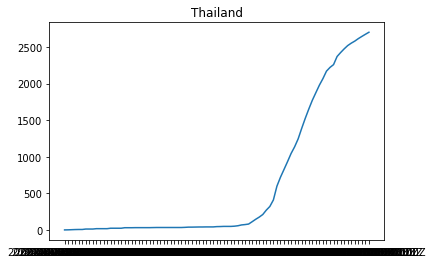

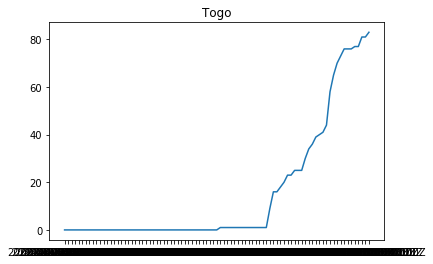

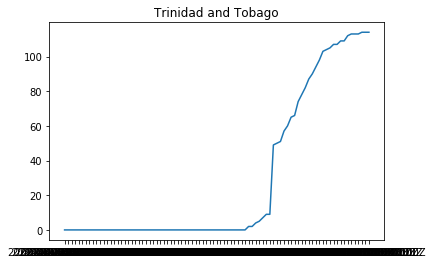

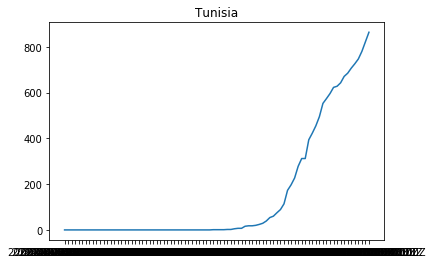

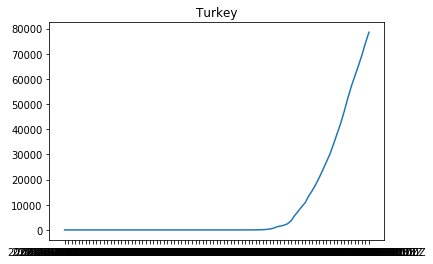

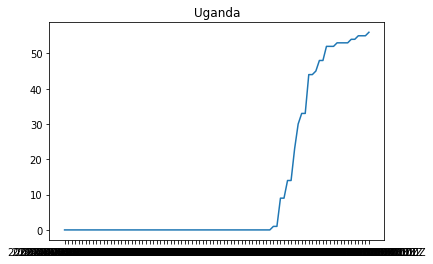

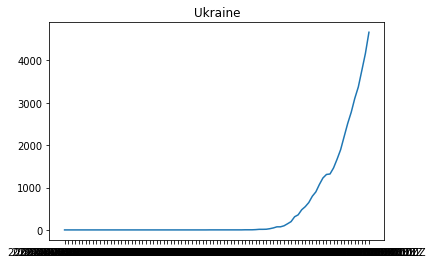

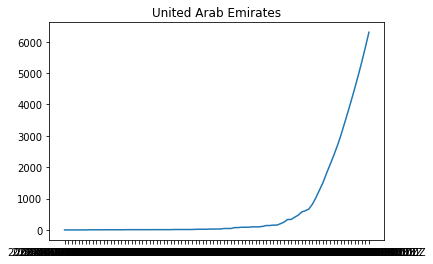

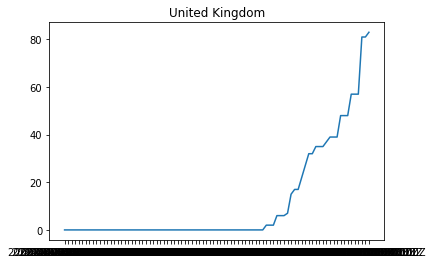

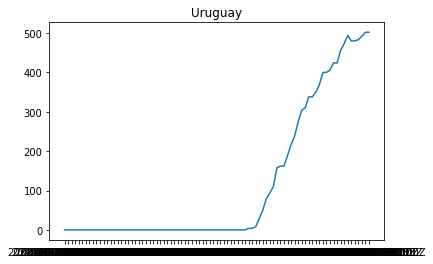

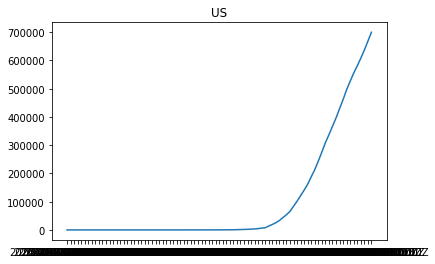

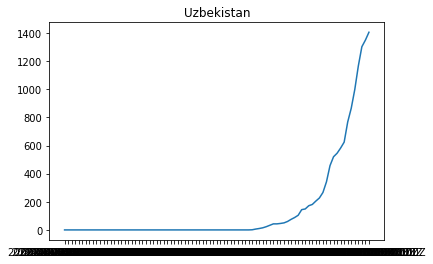

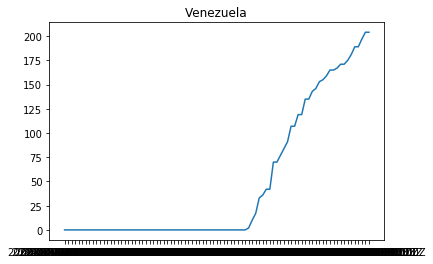

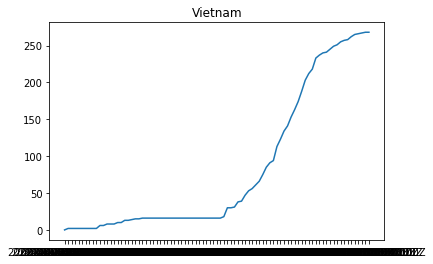

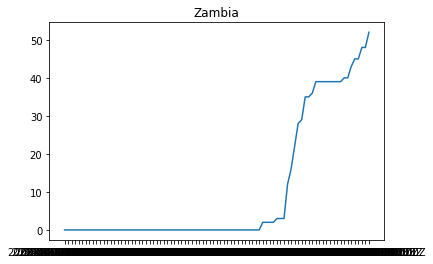

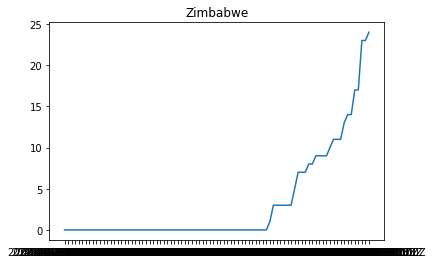

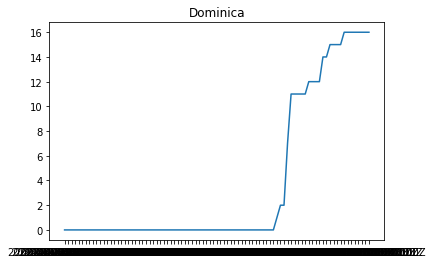

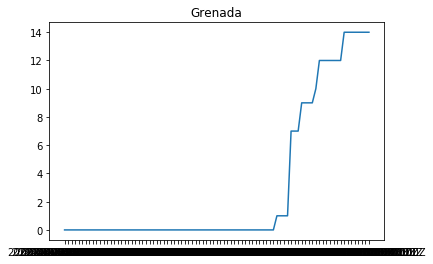

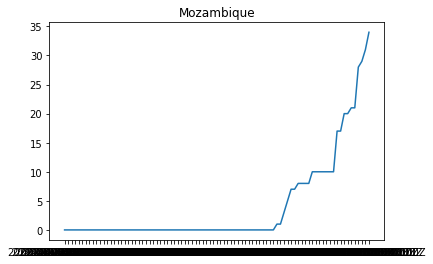

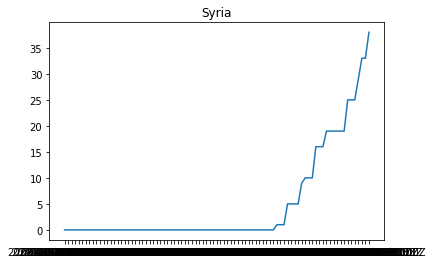

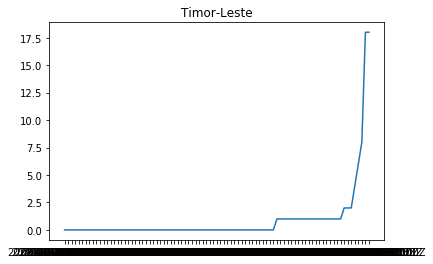

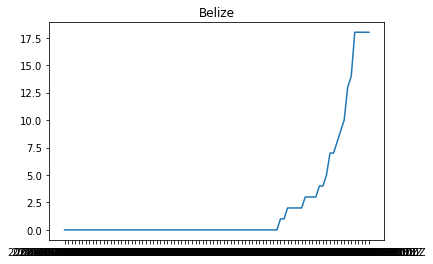

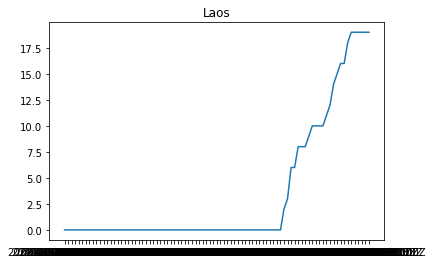

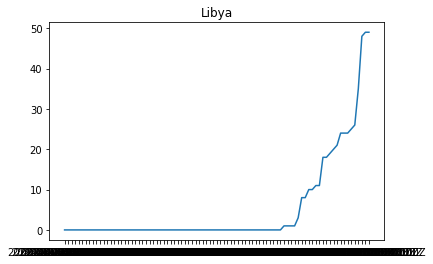

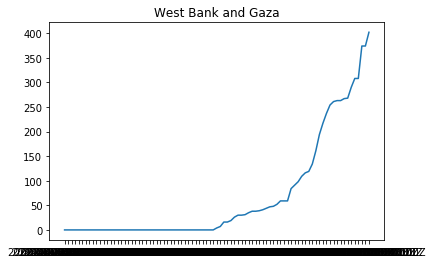

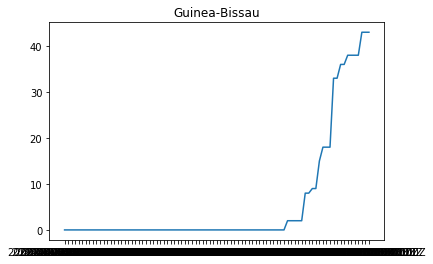

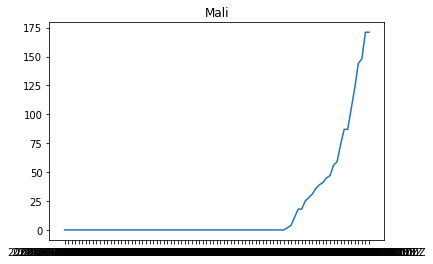

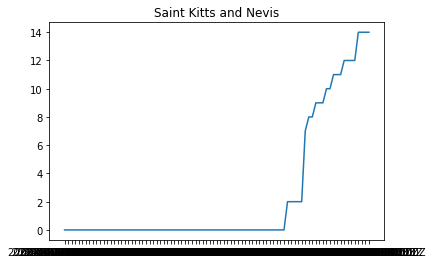

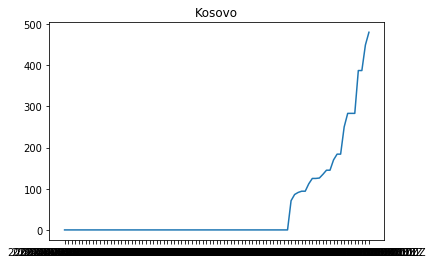

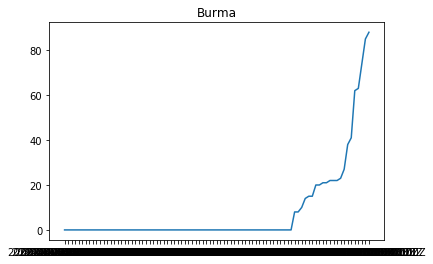

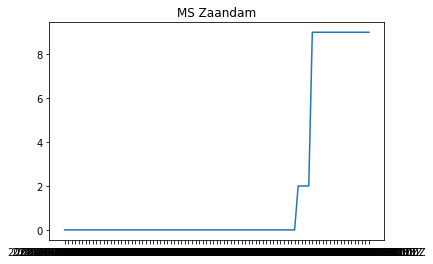

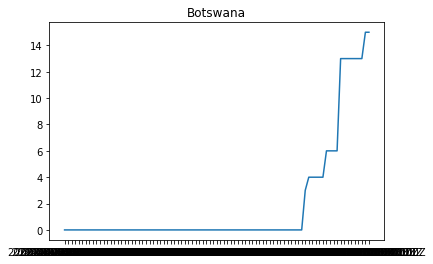

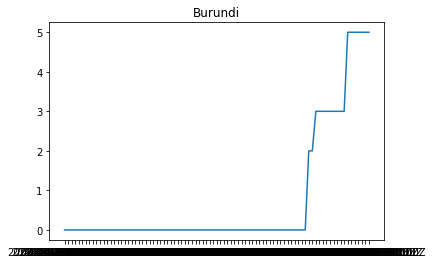

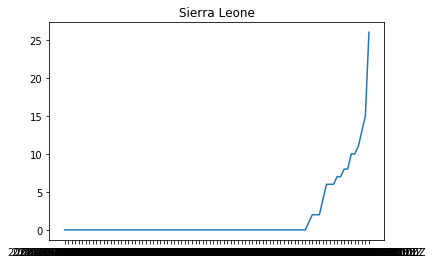

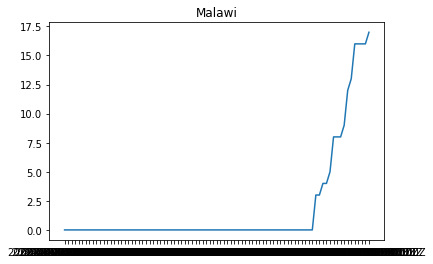

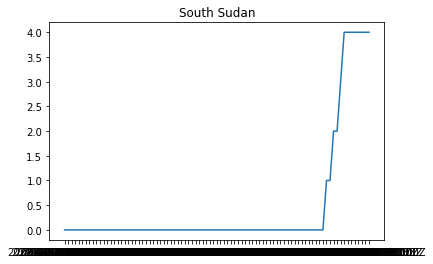

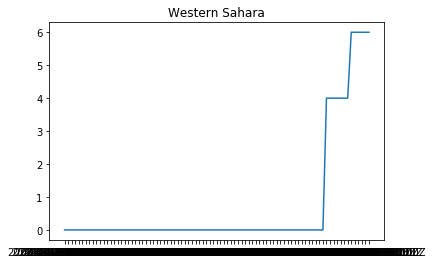

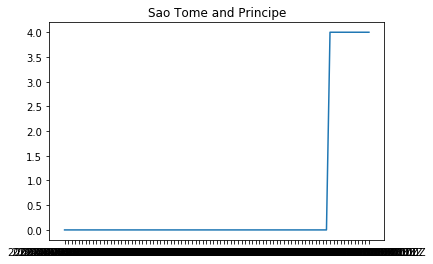

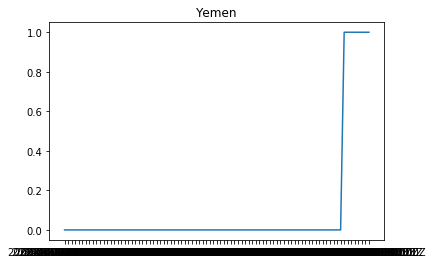

In [2]:
locations = covid19.getLocations(timelines=True)
visited = []
try:
    for i in range(len(locations)):
        timeline = []
        cases = []
        for time, case in locations[i]['timelines']['confirmed']['timeline'].items():
            timeline.append(time)
            cases.append(case)
        if (locations[i]['country'] not in visited):
            plt.plot(timeline, cases)
            plt.title(locations[i]['country'])
            plt.show()
            timeline.clear()
            cases.clear()
            visited.append(locations[i]['country'])
except IndexError:
    pass

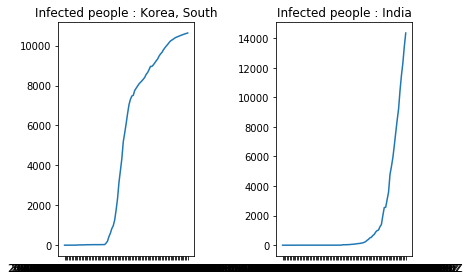

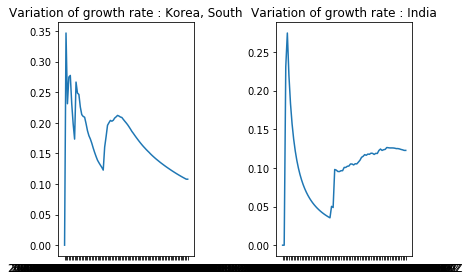

In [5]:
data_kr = covid19.getLocationByCountryCode("KR" ,timelines=True)
data_in = covid19.getLocationByCountryCode("IN" ,timelines=True)

case_kr = data_kr[0]['timelines']['confirmed']['timeline'].values()
case_in = data_in[0]['timelines']['confirmed']['timeline'].values()
case_in_mod = list(case_in)[8:]

time_kr = data_kr[0]['timelines']['confirmed']['timeline'].keys()
time_in = data_in[0]['timelines']['confirmed']['timeline'].keys()

plt.subplot(1,2,1)
plt.tight_layout()
plt.title('Infected people : ' + data_kr[0]['country'])
plt.plot(list(time_kr), list(case_kr))
plt.subplot(1,2,2)
plt.tight_layout()
plt.title('Infected people : ' + data_in[0]['country'])
plt.plot(list(time_in), list(case_in))
plt.show()

k_vector_kr = []
k_vector_in = []

try:
    for date in range(len(case_kr)):
        k_kr = (math.log(list(case_kr)[date+1], math.e) - math.log(list(case_kr)[0], math.e))/(date+1)
        k_vector_kr.append(k_kr)
except (IndexError, ValueError, ZeroDivisionError):
    k_vector_kr.append(k_vector_kr[-1])

try:
    for dates in range(len(case_in)):
        k_in = (math.log(case_in_mod[dates+1], math.e) - math.log(case_in_mod[0], math.e))/(dates+1)
        k_vector_in.append(k_in)
except (IndexError, ValueError, ZeroDivisionError):
    k_vector_in.append(k_vector_in[-1])
    
plt.subplot(1,2,1)
plt.tight_layout()
plt.title('Variation of growth rate : ' + data_kr[0]['country'])
plt.plot(list(time_kr), k_vector_kr)
plt.subplot(1,2,2)
plt.tight_layout()
plt.title('Variation of growth rate : ' + data_in[0]['country'])
plt.plot(list(time_in)[:len(k_vector_in)], k_vector_in)
plt.show()

In [9]:
y = np.array(k_vector_in).ravel()
x = np.array(range((len(y)))).reshape(-1,1)

clf = MLPRegressor(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x, y)
pred = clf.predict(np.array([[99], [100]]).reshape(-1,1))
print(pred)

[-0.02831496 -0.02831496]
